In [18]:
from fastai.vision import *
from pathlib import Path
from fastbook import *
from fastai.vision.widgets import *

In [19]:
path = Path(r'myDatasets/Intel_Image_Dataset/seg_train/seg_train')

In [20]:
path.ls()

(#5) [Path('myDatasets/Intel_Image_Dataset/seg_train/seg_train/buildings'),Path('myDatasets/Intel_Image_Dataset/seg_train/seg_train/forest'),Path('myDatasets/Intel_Image_Dataset/seg_train/seg_train/mountain'),Path('myDatasets/Intel_Image_Dataset/seg_train/seg_train/sea'),Path('myDatasets/Intel_Image_Dataset/seg_train/seg_train/street')]

In [21]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [22]:
dls = data.dataloaders(path)

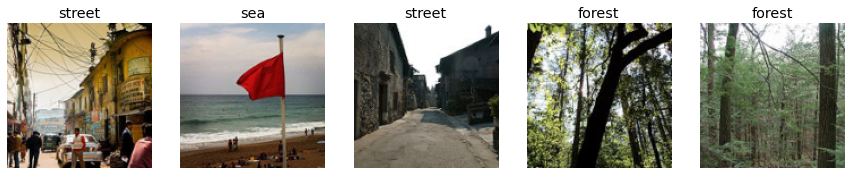

In [23]:
dls.show_batch(max_n=5,nrows=1)

In [24]:
data = data.new(
    item_tfms=RandomResizedCrop(224,min_scale=.5),
    batch_tfms=aug_transforms())
dls = data.dataloaders(path)

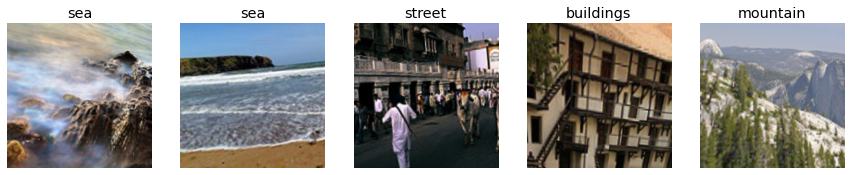

In [25]:
dls.show_batch(max_n=5,nrows=1)

In [26]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)

In [27]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.363987,0.214132,0.943537,02:37


epoch,train_loss,valid_loss,accuracy,time
0,0.245441,0.171490,0.955861,03:23
1,0.152722,0.100171,0.967613,03:23
2,0.095123,0.093584,0.971912,03:23


In [28]:
learn.save('stage-1')

Path('models/stage-1.pth')

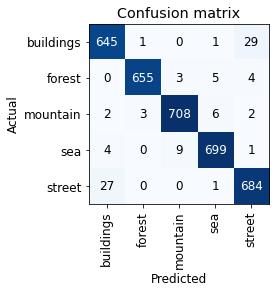

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

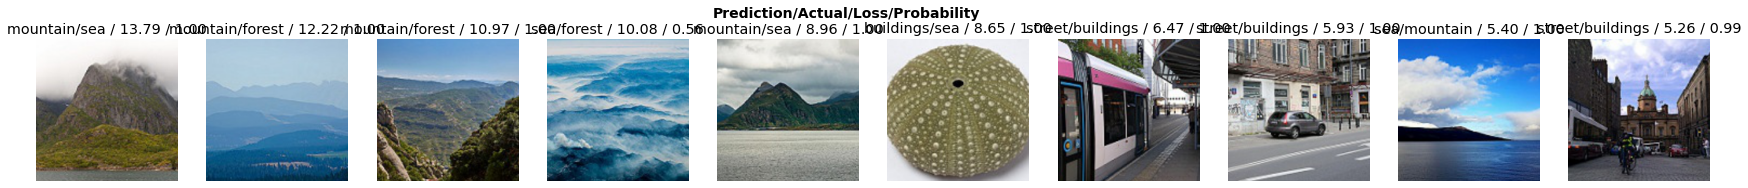

In [30]:
interp.plot_top_losses(10, nrows=1)

In [31]:
learn.export()